# Encoding, Binning

## Import

In [ ]:
pip install mglearn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mglearn

plt.rc('figure', figsize=(10, 6))

from matplotlib import rcParams
rcParams['font.family'] = 'DejaVu Sans'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

## Contents
- Feature(X값): 범주형 데이터
- [scikit-learn preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
  1. Label Encoding  
  2. Ordinal Encoding    
  3. One-hot Encoding
  4. [Mean Encoding](https://dailyheumsi.tistory.com/120)
  5. Binning

## Preparation

In [ ]:
df = pd.DataFrame({'col1': [70000, 64000, 72000, 59000, 57000, 67000, 62000 , 69000],
                   'col2': ['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']})
df

,col1,col2
0,70000,TV
1,64000,냉장고
2,72000,전자렌지
3,59000,컴퓨터
4,57000,선풍기
5,67000,선풍기
6,62000,믹서
7,69000,믹서


## Label Encoding

#### 판다스 이용

In [ ]:
cat = pd.Categorical(df['col2'])

print('Categories:', list(cat.categories))
print('Codes:     ', cat.codes)

Categories: ['TV', '냉장고', '믹서', '선풍기', '전자렌지', '컴퓨터']
Codes:      [0 1 4 5 3 3 2 2]


In [ ]:
df1 = df.copy()
df1['col2_label'] = cat.codes
df1

,col1,col2,col2_label
0,70000,TV,0
1,64000,냉장고,1
2,72000,전자렌지,4
3,59000,컴퓨터,5
4,57000,선풍기,3
5,67000,선풍기,3
6,62000,믹서,2
7,69000,믹서,2


#### 인코더 생성 - scikit-learn 이용

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

##### 인코더 학습 - 규칙 설정

In [ ]:
encoder.fit(df['col2'])

LabelEncoder()

##### 데이터 변환

In [ ]:
encoded = encoder.transform(df['col2'])

In [ ]:
print('Categories:', encoder.classes_)
print('Codes:     ', encoded)
print('Inverse:   ', encoder.inverse_transform(encoded))

Categories: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']
Codes:      [0 1 4 5 3 3 2 2]
Inverse:    ['TV' '냉장고' '전자렌지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


##### 판다스(DataFrame)로 표현

In [ ]:
df_t = pd.DataFrame(encoded, columns=['col2_label'])
pd.concat([df,df_t], axis=1)

,col1,col2,col2_label
0,70000,TV,0
1,64000,냉장고,1
2,72000,전자렌지,4
3,59000,컴퓨터,5
4,57000,선풍기,3
5,67000,선풍기,3
6,62000,믹서,2
7,69000,믹서,2


## Ordinal Encoding

#### 인코더 생성 - scikit-learn 이용

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

##### 인코더 학습 - 규칙 설정

In [ ]:
encoder.fit(df[['col2']])

OrdinalEncoder()

##### 데이터 변환

In [ ]:
encoded = encoder.transform(df[['col2']])

In [ ]:
print('Categories:', encoder.categories_)
print('Codes:     ', encoded.ravel())
print('Inverse:   ', encoder.inverse_transform(encoded).ravel())

Categories: [array(['TV', '냉장고', '믹서', '선풍기', '전자렌지', '컴퓨터'], dtype=object)]
Codes:      [0. 1. 4. 5. 3. 3. 2. 2.]
Inverse:    ['TV' '냉장고' '전자렌지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


##### 판다스(DataFrame)로 표현

In [ ]:
df_t = pd.DataFrame(encoded, columns=['col2_ordinal'])
pd.concat([df,df_t], axis=1)

,col1,col2,col2_ordinal
0,70000,TV,0.0
1,64000,냉장고,1.0
2,72000,전자렌지,4.0
3,59000,컴퓨터,5.0
4,57000,선풍기,3.0
5,67000,선풍기,3.0
6,62000,믹서,2.0
7,69000,믹서,2.0


## One-hot Encoding

#### 판다스 이용

In [ ]:
pd.get_dummies(df, columns=['col2'])

,col1,col2_TV,col2_냉장고,col2_믹서,col2_선풍기,col2_전자렌지,col2_컴퓨터
0,70000,True,False,False,False,False,False
1,64000,False,True,False,False,False,False
2,72000,False,False,False,False,True,False
3,59000,False,False,False,False,False,True
4,57000,False,False,False,True,False,False
5,67000,False,False,False,True,False,False
6,62000,False,False,True,False,False,False
7,69000,False,False,True,False,False,False


#### 인코더 생성 - scikit-learn 이용

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

##### 인코더 학습 - 규칙 설정

In [ ]:
encoder.fit(df[['col2']])

OrdinalEncoder()

##### 데이터 변환

In [ ]:
encoded = encoder.transform(df[['col2']])

In [ ]:
print('Categories:', encoder.categories_)
print('Codes:     ', encoded)
print('Inverse:   ', encoder.inverse_transform(encoded).ravel())

Categories: [array(['TV', '냉장고', '믹서', '선풍기', '전자렌지', '컴퓨터'], dtype=object)]
Codes:      [[0.]
 [1.]
 [4.]
 [5.]
 [3.]
 [3.]
 [2.]
 [2.]]
Inverse:    ['TV' '냉장고' '전자렌지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


In [ ]:
# 컬럼 이름
print(encoder.get_feature_names_out(['col2']))

['col2']


##### 판다스(DataFrame)로 표현

In [ ]:
df_t = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['col2']))
pd.concat([df,df_t], axis=1)

,col1,col2,col2
0,70000,TV,0.0
1,64000,냉장고,1.0
2,72000,전자렌지,4.0
3,59000,컴퓨터,5.0
4,57000,선풍기,3.0
5,67000,선풍기,3.0
6,62000,믹서,2.0
7,69000,믹서,2.0


## Mean Encoding

[category_encoders](https://contrib.scikit-learn.org/category_encoders/)

In [ ]:
!pip install category_encoders

#### 인코더 생성 - scikit-learn 이용

In [ ]:
from category_encoders.target_encoder import TargetEncoder
encoder = TargetEncoder(return_df=False)

##### 인코더 학습 - 규칙 설정

In [ ]:
encoder.fit(df['col2'], df['col1'])

TargetEncoder(cols=['col2'], return_df=False)

##### 데이터 변환

In [ ]:
encoded = encoder.transform(df['col2'])

In [ ]:
print(encoded)

[[65650.54237181]
 [64869.89152564]
 [65910.75932054]
 [64219.34915382]
 [64574.4468053 ]
 [64574.4468053 ]
 [65070.92553245]
 [65070.92553245]]


##### 판다스(DataFrame)로 표현

In [ ]:
df_t = pd.DataFrame(encoded, columns=['col2_mean'])
pd.concat([df,df_t], axis=1)

,col1,col2,col2_mean
0,70000,TV,65650.542372
1,64000,냉장고,64869.891526
2,72000,전자렌지,65910.759321
3,59000,컴퓨터,64219.349154
4,57000,선풍기,64574.446805
5,67000,선풍기,64574.446805
6,62000,믹서,65070.925532
7,69000,믹서,65070.925532


## Binning
* **Visual Python>Data prep>KBins discretize**  
* 연속형 데이터를 범주형 데이터로 변환하여 DT Model에 사용 및 성능 향상 가능

### 구간 분할, 이산화 - Binning  

#### wave 데이터셋에 적용한 선형 회귀와 결정 트리의 성능 비교

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

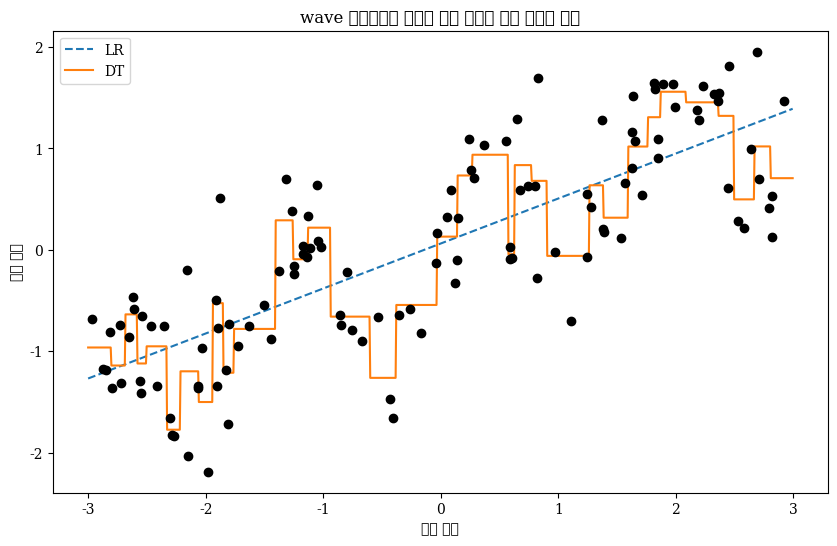

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn

# 데이터 생성
X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

# 선형 회귀
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label='LR')

# 결정 트리
reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label='DT')

# 원본 데이터 (X, y)
plt.plot(X[:, 0], y, 'o', c='k')

plt.title('wave 데이터셋에 적용한 선형 회귀와 결정 트리의 비교')
plt.xlabel('입력 특성')
plt.ylabel('회귀 출력')
plt.legend(loc='best')
plt.show()

#### 구간 분할( binning) - 밀집 행렬
* 밀집행렬은 대부분의 원소가 0이 아닌 실수 또는 정수로 채워진 행렬입니다.  
모든 행렬 요소가 메모리에 저장되며, 이러한 행렬은 2차원 배열로 표현됩니다.  

* 희소행렬은 대부분의 원소가 0인 행렬로, 비어있지 않은 원소들만을 저장하고 나머지는 0으로 간주합니다.  
희소행렬은 메모리 공간을 절약할 수 있으며, 대용량 데이터를 다룰 때 특히 유용합니다.  

* 일부 머신 러닝 또는 데이터 분석 알고리즘은 밀집 행렬을 입력으로 요구합니다. 희소 행렬은 0 이외의 값만 저장하기 때문에 일반적인 행렬 연산 라이브러리에서 지원하지 않는 경우가 있습니다. 따라서 희소 행렬을 밀집 행렬로 변환하여 이러한 알고리즘에 적용할 수 있게 됩니다.  

* **KBinsDiscretizer로 Binning하여 생성된 희소 행렬 데이터는 ".toarray()"로 밀집 행렬로 변환할 수 있습니다.**  
이후 데이터 분석 알고리즘(모델)에 사용하면 됩니다.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
# <참고>
# 희소 행렬로 생성시 밀집 행렬로 변환해서 사용
# X_binned.toarray() 함수 이용

# 희소 행렬로 생성
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
X_binned = kb.transform(X)

# 밀집 행렬로 변환
X_binned.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# 구간 분할 모델 생성
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')

In [ ]:
# 구간 분할 모델 학습 - 경계값 생성
kb.fit(X)

KBinsDiscretizer(encode='onehot-dense', n_bins=10, strategy='uniform')

In [ ]:
# 구간 분할 모델 데이터 변환
X_binned = kb.transform(X)

In [ ]:
# 구간 경계값
kb.bin_edges_

array([array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
              -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
               2.92132162])                                                   ],
      dtype=object)

In [ ]:
# 원본 데이터
X[:10]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547]])

In [ ]:
# 구간 분할 적용된 데이터
X_binned[:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

####  구간 분할된 특성에 적용한 선형 회귀와 결정 트리 회귀의 비교
- 각 구간에 기울기가 0인 수평한 회귀선 생성  

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

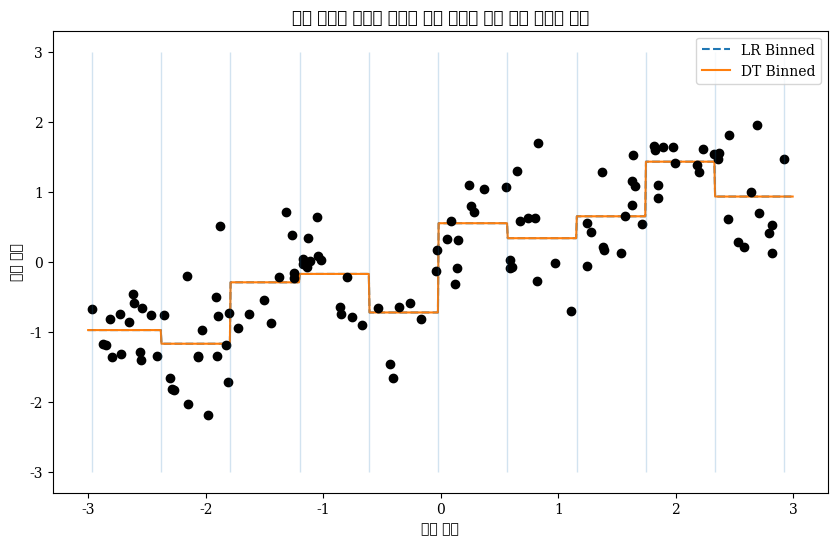

In [ ]:
# 구간 분할 적용(line)
line_binned = kb.transform(line)

# 선형 회귀
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='LR Binned')

# 결정 트리
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='DT Binned')

# 원본 데이터 (X, y)
plt.plot(X[:, 0], y, 'o', c='k')

# 구간 분할 표시
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=0.2)

plt.title('구간 분할된 특성에 적용한 선형 회귀와 결정 트리 회귀의 비교')
plt.xlabel('입력 특성')
plt.ylabel('회귀 출력')
plt.legend(loc='best')
plt.show()

## Example: Onehot Encoding with Logistic Regression

#### 데이터 로딩

In [ ]:
df_ad = pd.read_csv('./drive/MyDrive/Colab Notebooks/Machine Learning/adult.csv')
df_ad = df_ad[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
df_ad

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K
...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Female,38,Tech-support,<=50K
32557,40,Private,HS-grad,Male,40,Machine-op-inspct,>50K
32558,58,Private,HS-grad,Female,40,Adm-clerical,<=50K
32559,22,Private,HS-grad,Male,20,Adm-clerical,<=50K


#### 데이터 변환: One-hot Encoding

In [ ]:
df_ohe = pd.get_dummies(df_ad)
df_ohe

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,50,13,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,38,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,53,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,28,40,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,38,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
32557,40,40,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
32558,58,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
32559,22,20,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False


#### 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split

X = df_ohe.drop(['income_ <=50K','income_ >50K'], axis=1)
y = df_ohe['income_ >50K']

#income은 y값이니까 x에서 drop시킨 것이고, incomeo_50>K 지운 이유는, <=50K만 봐도 >50K를 알 수 있기 때문!

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

#### LogisticRegression - One-hot Encoding 적용

In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 생성
model = LogisticRegression(max_iter=5000)

# 모델 학습
model.fit(X_train, y_train)

# 모델 평가
model.score(X_test, y_test)

0.8180813167915489